In [4]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_provider import IBMProvider
import qiskit_ibm_provider.jupyter
 
#provider = IBMProvider('ibm-q')
#backend = provider.get_backend('ibmq_vigo')
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()# Built-in modules
import math

# Imports from Qiskit
from qiskit import QuantumCircuit
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
from qiskit.visualization import plot_distribution

# Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session

from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import plot_histogram
from qiskit import transpile
from qiskit.providers.fake_provider import GenericBackendV2

qiskit_runtime_service.__init__:INFO:2024-03-17 18:57:38,059: Default instance: ibm-q/open/main


In [5]:
def grover_oracle(marked_states):
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = len(marked_states[0])

    qc = QuantumCircuit(num_qubits)
    # Mark each target state in the input list
    for target in marked_states:
        # Flip target bit-string to match Qiskit bit-ordering
        rev_target = target[::-1]
        # Find the indices of all the '0' elements in bit-string
        zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]
        # Add a multi-controlled Z-gate with pre- and post-applied X-gates (open-controls)
        # where the target bit-string has a '0' entry
        qc.x(zero_inds)
        """ZAJ 1"""
        qc.ry(0.5,zero_inds)
        qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)
        qc.x(zero_inds)
    return qc

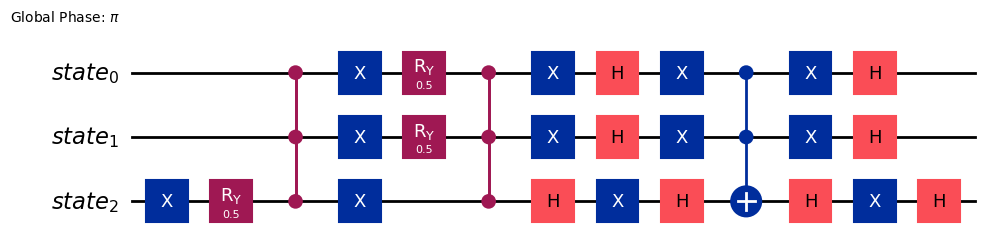

In [6]:
marked_states = ["011", "100"]

oracle = grover_oracle(marked_states)
grover_op = GroverOperator(oracle)
optimal_num_iterations = math.floor(
    math.pi / 4 * math.sqrt(2**grover_op.num_qubits / len(marked_states))
)
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))

# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)

"""ZAJ 2"""
#qc.x(range(grover_op.num_qubits))

# Measure all qubits
qc.measure_all()
#qc.draw('mpl')
grover_op.decompose().draw("mpl")

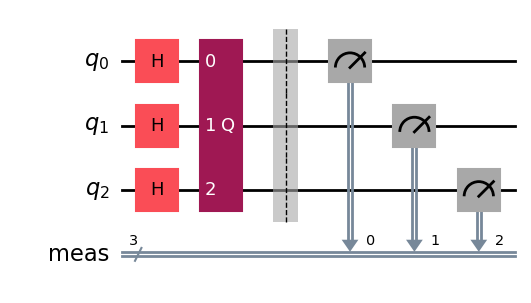

In [7]:
qc.draw("mpl")

In [8]:
backend = GenericBackendV2(num_qubits=5)

transpiled_circuit = transpile(qc, backend)

job = backend.run(transpiled_circuit)
counts = job.result().get_counts()

# Write counts data to a text file
with open('counts_data.txt', 'w') as file:
    file.write("State,Count\n")
    for state, count in counts.items():
        file.write(f"{state},{count}\n")

# Print counts data
print(counts)
print("State,Count\n")
for state, count in counts.items():
    print(f"{state},{count}\n")
#plot_histogram(counts)

{'101': 21, '001': 17, '110': 24, '010': 19, '000': 196, '111': 8, '011': 501, '100': 238}
State,Count

101,21

001,17

110,24

010,19

000,196

111,8

011,501

100,238

